In [5]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [7]:
# Load dataset
data = pd.read_csv('customer_data.csv')

In [9]:
# Display basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer_ID            500 non-null    int64
 1   Monthly_Bill           500 non-null    int64
 2   Outstanding_Balance    500 non-null    int64
 3   Payment_Delay_Days     500 non-null    int64
 4   Electricity_Usage_kWh  500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [11]:
# Handling missing values
data.fillna(method='ffill', inplace=True)

C:\Users\engrd\AppData\Local\Temp\ipykernel_6500\3008731174.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [13]:
# Selecting relevant features for segmentation
features = ['Monthly_Bill', 'Outstanding_Balance', 'Payment_Delay_Days', 'Electricity_Usage_kWh']
X = data[features]

In [15]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [19]:
# Finding optimal number of clusters using the Elbow method
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

C:\Users\engrd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\engrd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\engrd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\engrd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

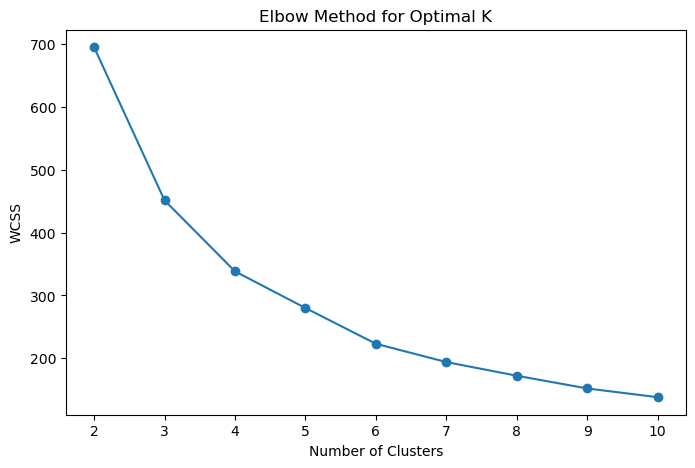

In [21]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [23]:
# Choosing optimal K
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

C:\Users\engrd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [25]:
data['Cluster'] = clusters

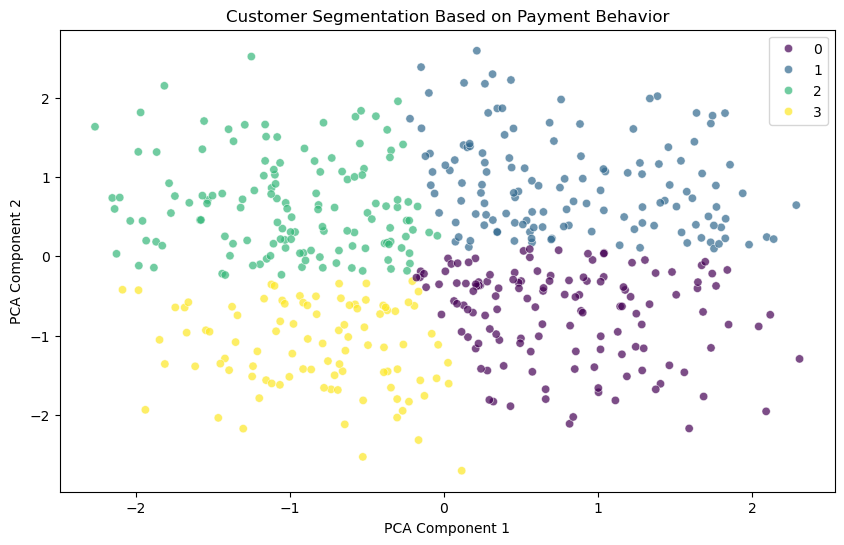

In [27]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation Based on Payment Behavior')
plt.legend()
plt.show()

In [31]:
# Analyzing each cluster
cluster_summary = data.groupby('Cluster')[features].mean()
print("Cluster Analysis Summary:")
print(cluster_summary)

Cluster Analysis Summary:
         Monthly_Bill  Outstanding_Balance  Payment_Delay_Days  \
Cluster                                                          
0         7573.849624         35095.511278           37.721805   
1        13899.962687         28031.343284           43.589552   
2        12481.698529         12719.808824           18.713235   
3         5589.463918         20069.092784           18.257732   

         Electricity_Usage_kWh  
Cluster                         
0                  1770.105263  
1                   969.985075  
2                  1185.985294  
3                  2131.247423  
